# Signatures for strong-field QED physics in the quantum limit of beamstrahlung

Authors: W. L. Zhang, T. Grismayer, L. O. Silva

Pre-print: https://arxiv.org/abs/2302.01321v2

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, sqrt
from scipy.special import gamma, factorial
from scipy.constants import alpha, c, hbar, m_e
import mpmath
# unfortunately scipy.gammainc https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gammainc.html#r38b39fcda251-dlmf does not support genative a values
# alternative is to use mpmath, or use recursion relation https://en.wikipedia.org/wiki/Incomplete_gamma_function#Properties

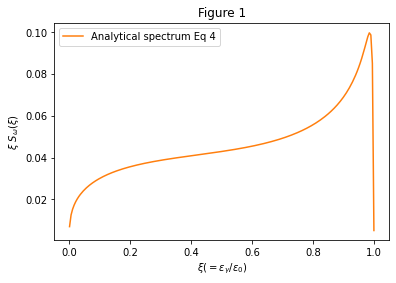

In [36]:
# Figure 1
tauc = hbar/(m_e*c**2) # Compton time

sigz = 30.7e-9 #[m]
gm = 90e9/0.511e6 #[] 
chiemax = 200

def Sw(xi):
    b0 = 2/(3*chiemax)*xi/(1-xi)
    k23 = 1.2 # fitting argument (see text)
    return float( 2*sqrt(2)*alpha*sigz * k23 / (sqrt(3)*pi*tauc*gm*c) * (2+xi**2/(1-xi)) * b0**2 * mpmath.gammainc(-8/3,b0))
Sw = np.vectorize(Sw)

xilst = np.linspace(1e-3,1-1e-3,200)
plt.plot(xilst, xilst*Sw(xilst), label=r'Analytical spectrum Eq 4', color='tab:orange')
plt.xlabel(r'$\xi(=\varepsilon_\gamma/\varepsilon_0)$')
plt.ylabel(r'$\xi ~S_\omega(\xi)$')
plt.legend()
plt.title(r'Figure 1')
plt.show()

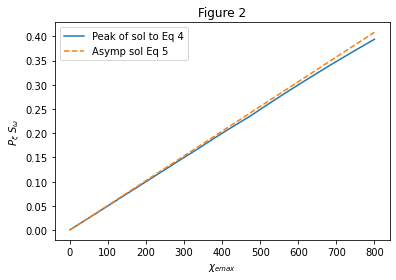

In [44]:
# Figure 2
sigz = 30.7e-9 #[m]
gm = 90e9/0.511e6 #[] 
def Sw(xi,chiemax):
    b0 = 2/(3*chiemax)*xi/(1-xi)
    k23 = 1.2 # fitting argument (see text)
    return float( 2*sqrt(2)*alpha*sigz * k23 / (sqrt(3)*pi*tauc*gm*c) * (2+xi**2/(1-xi)) * b0**2 * mpmath.gammainc(-8/3,b0))
Sw = np.vectorize(Sw)

def getPxiSw(chiemax):
    xilst = np.linspace(1e-6,1-1e-6,400)
    return np.max(xilst*Sw(xilst,chiemax))
getPxiSw = np.vectorize(getPxiSw)

chiemaxlst = np.linspace(1,800,50)
plt.plot(chiemaxlst, getPxiSw(chiemaxlst), label=r'Peak of sol to Eq 4', color='tab:blue')
plt.plot(chiemaxlst, 0.155*alpha*sigz*chiemaxlst/(tauc*gm*c), '--', label=r'Asymp sol Eq 5', color='tab:orange')
plt.xlabel(r'$\chi_{emax}$')
plt.ylabel(r'$P_\xi ~S_\omega$')
plt.legend()
plt.title(r'Figure 2')
plt.show()